In [23]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


In [24]:
data = pd.read_csv('model_df.csv', index_col=0)

In [25]:
drop_cols = ['earliest_cr_line', 'grade', 'id', 'fico_range_low']
data= data.drop(drop_cols,axis=1)

(0, 50)

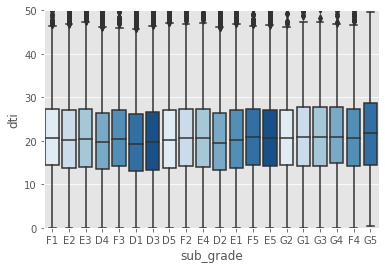

In [26]:
import seaborn as sns

sns.boxplot(x='sub_grade', y='dti' , data=data, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

## Random Forest

In [30]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [31]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,10400.0,60 months,22.45,289.91,F1,3,MORTGAGE,104433.0,2015-12-01,major_purchase,PA,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,Individual,0.128894,17.5
13,18000.0,60 months,19.48,471.70,E2,7,RENT,150000.0,2015-12-01,debt_consolidation,CA,9.39,0.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,Individual,-0.474848,10.5
19,8650.0,36 months,19.89,320.99,E3,8,RENT,55000.0,2015-12-01,debt_consolidation,IN,25.49,0.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,Individual,0.062484,10.8
27,16000.0,60 months,17.97,406.04,D4,1,MORTGAGE,109000.0,2015-12-01,debt_consolidation,NM,23.35,0.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,Individual,0.091973,13.7
31,24250.0,60 months,24.24,701.01,F3,4,MORTGAGE,75000.0,2015-12-01,debt_consolidation,NY,20.84,0.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,Individual,-0.829921,8.7


In [34]:
le = LabelEncoder()

In [35]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    data[feature]=le.fit_transform(data[feature])
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,10400.0,1,22.45,289.91,10,3,1,104433.0,100,6,38,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,0,0.128894,17.5
13,18000.0,1,19.48,471.70,6,7,5,150000.0,100,2,4,9.39,0.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,0,-0.474848,10.5
19,8650.0,0,19.89,320.99,7,8,5,55000.0,100,2,15,25.49,0.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,0,0.062484,10.8
27,16000.0,1,17.97,406.04,3,1,1,109000.0,100,2,32,23.35,0.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,0,0.091973,13.7
31,24250.0,1,24.24,701.01,12,4,1,75000.0,100,2,34,20.84,0.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,0,-0.829921,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260514,6400.0,0,19.99,237.82,3,0,1,18876.0,110,2,34,12.84,0.0,674.0,0.0,5.0,1.0,7380.0,70.3,11.0,0.0,0.0,0.0,0,0.162377,10.4
2260535,30000.0,1,17.99,761.64,1,10,5,130000.0,110,2,34,10.54,0.0,699.0,2.0,17.0,0.0,21536.0,36.4,39.0,0.0,0.0,0.0,0,0.110282,19.0
2260541,7000.0,0,16.99,249.54,0,1,5,68000.0,110,2,43,12.60,0.0,669.0,1.0,7.0,0.0,4897.0,85.9,15.0,0.0,0.0,0.0,0,0.119273,12.3
2260547,19200.0,1,17.99,487.45,1,10,5,55000.0,110,2,9,28.47,1.0,674.0,0.0,20.0,1.0,12698.0,44.6,33.0,0.0,0.0,0.0,0,-0.410815,14.4


In [36]:
Xrf = data.drop('roi_percent', axis=1)
yrf = data['roi_percent']


In [38]:
from sklearn.model_selection import train_test_split

Xrf_train,Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf)

In [ ]:
randomForest = ensemble.RandomForestRegressor()

grid_param_forest = [{
    "n_estimators": [25, 50, 100],
    "max_features": [5,10,15,20],
    "random_state": [42]}]

grid_randomForest= GridSearchCV(estimator = randomForest,param_grid=grid_param_forest, scoring='r2',cv=5)


grid_randomForest.fit(Xrf_train,yrf_train)


In [ ]:
grid_randomForest.best_params_
